In [52]:
from cdo import Cdo
import numpy as np 
import xarray as xr
from netCDF4 import Dataset

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator



In [6]:
## pip install xarray 
## pip install cartopy

In [68]:
def get_file(date):
    year=str(date)[0:4]
    address="http://clima-dods.ictp.it/Users/tompkins/data/Observations/TRMM/3B42/V7/daily/netcdf/"
    file=address+str(year)+"/trmm_3B42_v7_"+str(date)+".nc"
    url = (file+'#mode=bytes')
    ds = Dataset(url)
    return(ds)

def get_filex(date):
# Open the NetCDF file
    year=str(date)[0:4]
    address="http://clima-dods.ictp.it/Users/tompkins/data/Observations/TRMM/3B42/V7/daily/netcdf/"
    file=address+str(year)+"/trmm_3B42_v7_"+str(date)+".nc"
    ds = xr.open_dataset(file+'#mode=bytes') 
    return (ds)


In [69]:
ds=get_filex(20000101)

In [64]:
ds

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    CDI: Climate Data Interface version 1.8.1 (http://mpimet.mpg.de/cdi)
    Conventions: CF-1.6
    creation_date: Tue Jun  6 07:41:51 CEST 2017
    info: 
The 3B-42 estimates are scaled to match the monthly rain gauge analyses
used in 3B-43.The output is rainfall for 0.25x0.25 degree grid boxes   
every 3 hours.

    description: 
http://disc.sci.gsfc.nasa.gov/precipitation/documentation/TRMM_README/TRMM_3B42_readme.shtml

    ftp: 
http://disc.sci.gsfc.nasa.gov/data/datapool/TRMM_DP/01_Data_Products/02_Gridded/06_3-hour_Gpi_Cal_3B_42

    title: TRMM_3B42
    frequency: day
    CDO: Climate Data Operators version 1.8.1 (http://mpimet.mpg.de/cdo)
    history: Tue Jun  6 07:42:09 2017: ncatted -a units,precip,m,c,mm/day trmm_3B42_v7_20000101.nc
Tue Jun 06 07:42:07 2017: cdo -f nc4 -z zip_9 daymean -mulc,24 all.nc trmm_3B42_v7_20000101.nc
Tue Jun 06 07:42:06 2017: cdo mergetime trmm_3B42_20000101.00.7.nc trmm_

In [71]:
# Select the desired lat-lon box
ds_selected = ds.sel(lat=slice(10, 30), lon=slice(-120, -100)) 


In [72]:
lon=np.asarray(ds["lon"])
lat=np.asarray(ds["lat"])
precip=np.asarray(ds["precip"][0,:,:])

In [73]:
np.max(lat)

np.float32(49.875)

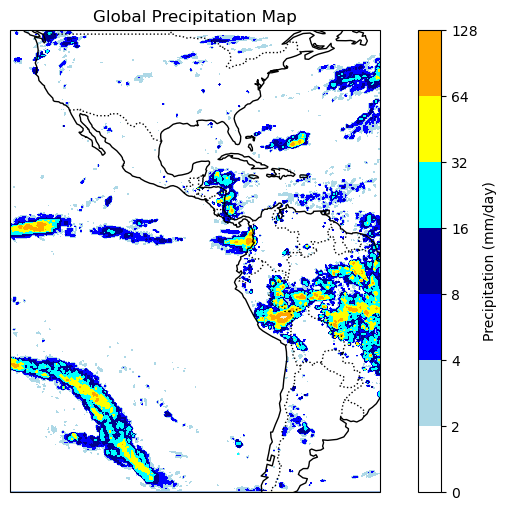

In [76]:
# --- Sample Precipitation Data (Replace with your actual data) ---
# Assuming you have:
# - 'lon': Longitude values (1D array)
# - 'lat': Latitude values (1D array)
# - 'precipitation': Precipitation data (2D array, matching lon and lat dimensions) 
# --------------------------------------------------------------

# Define contour levels
levels = [0, 2, 4, 8, 16, 32, 64, 128]
colors = ['white', 'lightblue', 'blue', 'darkblue', 'cyan', 'yellow', 'orange'] 

# Create a figure and axis with the desired projection
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()}) 

# Create a BoundaryNorm for the colormap
# norm = BoundaryNorm(levels, ncolors=len(levels) - 1)

# Choose a colormap with white for zero rain (e.g., 'viridis_r')
cmap = 'jet' 

# Plot precipitation data with contours
im = ax.contourf(lon, lat, precip, levels=levels, transform=ccrs.PlateCarree(), colors=colors)

# Add contours for rain levels
#contours = ax.contour(lon, lat, precip, levels=levels, colors='black', linewidths=0.5, transform=ccrs.PlateCarree())

# Add labels to contours
ax.clabel(contours, inline=True, fontsize=8, fmt='%1.0f') 

# Add features to the map
ax.coastlines()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Set the map extent 
# Adjust these values to focus on a specific region
ax.set_extent([-130, -50, -50, 50], crs=ccrs.PlateCarree()) 

# Add colorbar
cbar = plt.colorbar(im, ax=ax, orientation='vertical')
cbar.set_label('Precipitation (mm/day)') 

# Add title
plt.title('Global Precipitation Map')

# Show the plot
plt.show()

In [77]:
### 17.5°-35°N, 100°-120°W



In [ ]:
Qglobal[n] = np.average( Qann[:,n], weights=np.cos(np.deg2rad(lat)))